# Machine Learning Project

#### Author Deepak Agarwal

# Overview

### The project is about data mining and analysis using Natural Language Processing and Machine Learning. 
### We have a data set yelp reviews which is taken from kaggle and is a subset of Yelp's businesses, reviews, and user data.

### Objective:  What's in a review? Is it positive or negative? Yelp's reviews contain a lot of metadata that can be mined and used to infer meaning, business attributes, and sentiment. 

<a id='overview'></a>

## About Yelp

**Yelp connects people with great local businesses.**

 ![yelp](https://s3-media3.fl.yelpcdn.com/assets/srv0/seo_metadata/f9149736ad8d/assets/img/logos/yelp_og_image.png)

# We will have the following workflow :


#### 1. Text analysis using NLP 
        a. Sentence detection and segmentation
        b. Named Entity Recognition (NER) 
        c. Part of speech tagging (POS)
        d. Text normalization, like stemming/lemmatization and shape analysis, 
        e. Token-level entity analysis
        f. Token Attributes

#### 2. Data Preprocessing
        a. Exploratory Data Analysis (EDA)
        b. Train-Test Split
        c. Label Encoding
        
#### 3. Machine Learning - Building a Classification Model of yelp reviews using
        a. Word2Vec Embedding Layer and Bidirectional LSTM
        b. Sequential LSTM
        c. Convolutional Neural Networks (CNN) with LSTM
        d. Support Vector Classifier

#### 4. Evaluation of model using - 
        a. Precision 
        c. Recall

# Let's get started

In [1]:
!who

ubuntu   pts/1        2018-04-20 20:53 (161.253.2.252)


In [2]:
!ifconfig

ens3      Link encap:Ethernet  HWaddr 12:1e:32:00:58:2a  
          inet addr:172.31.21.187  Bcast:172.31.21.255  Mask:255.255.255.0
          inet6 addr: fe80::101e:32ff:fe00:582a/64 Scope:Link
          UP BROADCAST RUNNING MULTICAST  MTU:9001  Metric:1
          RX packets:19300 errors:0 dropped:0 overruns:0 frame:0
          TX packets:30505 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:16910560 (16.9 MB)  TX bytes:37213432 (37.2 MB)

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          inet6 addr: ::1/128 Scope:Host
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:2735 errors:0 dropped:0 overruns:0 frame:0
          TX packets:2735 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1 
          RX bytes:2780559 (2.7 MB)  TX bytes:2780559 (2.7 MB)



<a id='split'></a>

## Install the required libraries

In [3]:
#%%capture
#!pip install spacy
#!pip install keras
#!pip install tensorflow
#!python -m spacy download en
#!pip install sklearn

## Check whether GPU is running

In [4]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

[[22. 28.]
 [49. 64.]]


## Load required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import spacy;
import warnings;

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from collections import Counter
from datetime import datetime
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout, Activation
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

from keras.models import Model

import numpy as np

from spacy import displacy


warnings.filterwarnings("ignore")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the dataset

In [5]:
import os

yelp_reviews=pd.read_csv("yelp_review.csv",usecols=["stars","text"])
yelp_reviews.head(2)

,stars,text
0,5,Super simple place but amazing nonetheless. It...
1,5,Small unassuming place that changes their menu...


### Let's check out a sample review

In [6]:
yelp_reviews.text[1]

"Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station."

### Checking for nulls

In [7]:
yelp_reviews.isnull().any()

stars    False
text     False
dtype: bool

### Number of reviews

In [8]:
yelp_reviews.shape

(5261668, 2)

### Number of business in each review

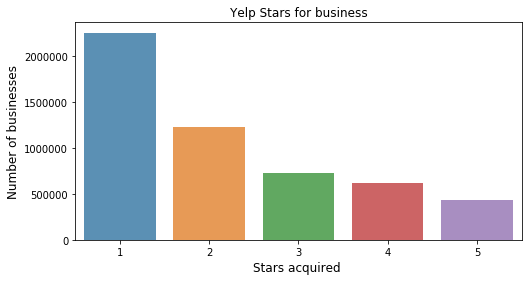

In [9]:
x=yelp_reviews['stars'].value_counts()
y=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);

### Conversion to binary classification

Let's make a simple binary classifcation problem with positive (stars= 4 and 5) and negative(stars= 1 and 2) labels I have converted stars column as binary column. We have removed neutral class having stars=3 for simplicity.

In [10]:
reviews=yelp_reviews[:300000]
reviews=reviews[reviews.stars!=3]

reviews["labels"]= reviews["stars"].apply(lambda x: 1 if x > 3  else 0)
reviews=reviews.drop("stars",axis=1)

reviews.head()

,text,labels
0,Super simple place but amazing nonetheless. It...,1
1,Small unassuming place that changes their menu...,1
2,Lester's is located in a beautiful neighborhoo...,1
3,Love coming here. Yes the place always needs t...,1
4,Had their chocolate almond croissant and it wa...,1


# Text analysis using NLP 

### We will use Spacy package 

SpaCy is a natural language processing (NLP) library for Python.

Spacy handles many tasks commonly associated with building an end-to-end natural language processing pipeline:

1. Tokenization
2. Text normalization, such as lowercasing, stemming/lemmatization
3. Part-of-speech tagging
4. Syntactic dependency parsing
5. Sentence boundary detection
6. Named entity recognition and annotation

<a id='split'></a>

### View a sampled review

In [11]:
sample_review=reviews.text[2]
sample_review

"Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the inside. \n\nThe smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well."

<a id='split'></a>

### Load Spacy and view a parsed review

In [12]:
nlp = spacy.load('en')
parsed_review = nlp(sample_review)
print(parsed_review)

Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the inside. 

The smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well.


<a id='split'></a>

### Visualizing the dependency parse

The dependency visualizer, dep, shows part-of-speech tags and syntactic dependencies.

In [13]:
displacy.render(parsed_review, style='dep',jupyter=True,options={'distance':150})

### View dependency parse in compact mode

In [14]:
displacy.render(parsed_review, style='dep',jupyter=True,options={'distance':100, 'compact':True})

### Visualize the entity recogziner

The entity visualizer, ent, highlights named entities and their labels in a text.

In [15]:
displacy.render(parsed_review, style='ent',jupyter=True)

### Sentence detection and segmentation

In [16]:
for num, sentence in enumerate(parsed_review.sents):
    print ('Sentence {}:'.format(num + 1))
    print (sentence)
    print ('\n')

Sentence 1:
Lester's is located in a beautiful neighborhood and has been there since 1951.


Sentence 2:
They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for.


Sentence 3:
They've got about 12 seats outside to go along with the inside. 




Sentence 4:
The smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well.




### Named Entity Recognition

In [17]:
for num, entity in enumerate(parsed_review.ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('\n')

Entity 1: Lester - PERSON


Entity 2: 1951 - DATE


Entity 3: about 12 - CARDINAL


Entity 4: Schwartz - PERSON


Entity 5: Lester - PERSON




### POS (Part of speech) tagging

POS tagging is a common pre-processing step in many NLP pipelines. 

A part-of-speech tag is the syntactic category associated with a particular word in a sentence, such as a noun, verb, preposition, determiner, adjective or adverb. Part-of-speech tagging is a fundamental task in natural language processing; see the [chapter in Juraksky & Martin's *Speech and Language Processing*](https://web.stanford.edu/~jurafsky/slp3/10.pdf) for more background. 

For example, words with certain POS tags are more important than other words for capturing the content of a text (e.g. nouns and verbs carry more semantic meaning than grammatical words like prepositions and determiners), so models often take this into account when predicting the topic, sentiment, or some other categorical dimensions of a text.

In [18]:
token_text = [token.orth_ for token in parsed_review]
token_pos = [token.pos_ for token in parsed_review]

parts_of_speech=pd.DataFrame(data=list(zip(token_text, token_pos)),columns=['token_text', 'part_of_speech'])
parts_of_speech.head(15)

,token_text,part_of_speech
0,Lester,PROPN
1,'s,PART
2,is,VERB
3,located,VERB
4,in,ADP
5,a,DET
6,beautiful,ADJ
7,neighborhood,NOUN
8,and,CCONJ
9,has,VERB


### Text normalization -  Stemming/Lemmatization and Shape Analysis

The work at this stage attempts to reduce as many different variations of similar words into a single term ( different branches all reduced to single word stem). Therefore if we have "running", "runs" and "run", you would really want these three distinct words to collapse into just the word "run". (However of course you lose granularity of the past, present or future tense).



In [19]:
token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

text_normalized_DF=pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])
text_normalized_DF.head(12)

,token_text,token_lemma,token_shape
0,Lester,lester,Xxxxx
1,'s,'s,'x
2,is,be,xx
3,located,locate,xxxx
4,in,in,xx
5,a,a,x
6,beautiful,beautiful,xxxx
7,neighborhood,neighborhood,xxxx
8,and,and,xxx
9,has,have,xxx


### Token-level entity analysis

Here we have analysed the entity type for each token (word)

In [20]:
token_entity_type = [token.ent_type_ for token in parsed_review]
token_entity_iob = [token.ent_iob_ for token in parsed_review]

entity_analysis=pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob)),
             columns=['token_text', 'entity_type', 'inside_outside_begin'])
entity_analysis.head()

,token_text,entity_type,inside_outside_begin
0,Lester,PERSON,B
1,'s,,O
2,is,,O
3,located,,O
4,in,,O


### Token  attributes

It shows attributes of token such as the relative frequency of tokens, and whether or not a token matches any of these categories

* Stopword
* Punctuation
* Whitespace
* Represents a number
* Whether or not the token is included in spaCy's default vocabulary?

In [21]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_review]

token_attributes = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

token_attributes.loc[:, 'stop?':'out of vocab.?'] = (token_attributes.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
token_attributes.head()

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,Lester,-20.0,,,,,Yes
1,'s,-20.0,,,,,Yes
2,is,-20.0,Yes,,,,Yes
3,located,-20.0,,,,,Yes
4,in,-20.0,Yes,,,,Yes


# Data Preprocessing

Here we will perform following tasks before applying the model :

1. Separate text and labels 
2. We will take balanced set of positive and negative reviews
3. Tokenize and generate pad sequences

### Preparing the Data

In [118]:
texts = reviews["text"].values
labels = reviews["labels"].values

### Split the data into training and testing

In [119]:
X_train, X_test, y_train, y_test = train_test_split(texts,labels, test_size=0.3, random_state=0)

<a id='lstm'></a>

## Bidirectional LSTM Model using Word2Vec Pretrained Glove Embeddings

Here we will perform following tasks before applying the model :

1. Separate text and labels 
2. Convert Text into numerical representation (aka Tensors)
3. Split Data into training and validation set

### Separate text and labels

### Converting text into numerical representation i.e Tensors
Now we can format our text samples and labels into tensors that can be fed into a neural network. 
Some Preprocessing is needed here.

Tokenization - We need to break down the sentence into unique words.

For eg, "I am learning Natural Language Processing" will become ["I","am","learning","Natural","Language","Processing"]

To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.



### Tokenize and generate pad sequences

In [81]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
train_data = pad_sequences(sequences, maxlen=300)

In [106]:
MAX_NUM_WORDS=2000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH=300 # max number of words in a review to use

word_index = tokenizer.word_index

y_train_labels = to_categorical(np.asarray(y_train))

print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', y_train_labels.shape)

Shape of data tensor: (186066, 300)
Shape of label tensor: (186066, 2)


<a id='split'></a>

###  Split the data into a training set and a validation set

In [107]:
VALIDATION_SPLIT=0.5

indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
data = train_data[indices]
labels = y_train_labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


## Building a Model

### Preparing the Embedding layer

We will use popular 'Glove Embeddings' with 6 Billion tokens, 400k vocab and having 100d vectors (https://nlp.stanford.edu/projects/glove/) 

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space

In [108]:
GLOVE_DIR='/home/ubuntu/'

import os
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


<a id='embedding_matrix'></a>


### Compute  embedding matrix
At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix


In [109]:
EMBEDDING_DIM = 100 # how big is each word vector

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

### Define Embedding Layer 
 We load this embedding matrix into an Embedding layer. Note that we set trainable=False to prevent the weights from being updated during training.


In [110]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

### Training model 

We can now define our Bidirectional LSTM model with Global Max Pooling. Here we apply a pre-trained glove embedding layer, a single Bidirectional hidden LSTM layer with 50 memory units with dropout probability if 10. There is one Dense layer with 100 units and activation function as relu and dropout with a probability of 20. The output layer is a Dense layer using the sigmoid activation function to output a probability prediction for each of the characters between 0 and 1.

In [111]:
inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedded_sequences = embedding_layer(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(2, activation="sigmoid")(x)
modelBILSTM = Model(inputs=inp, outputs=x)
modelBILSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### This is going to take a while

In [112]:
modelBILSTM.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=512);

Train on 93033 samples, validate on 93033 samples
Epoch 1/3
93033/93033 [==============================] - 200s 2ms/step - loss: 0.4737 - acc: 0.7859 - val_loss: 0.3464 - val_acc: 0.8478
Epoch 2/3
93033/93033 [==============================] - 196s 2ms/step - loss: 0.2914 - acc: 0.8765 - val_loss: 0.2312 - val_acc: 0.9039
Epoch 3/3
93033/93033 [==============================] - 196s 2ms/step - loss: 0.2209 - acc: 0.9092 - val_loss: 0.1927 - val_acc: 0.9212


# Sequential Model Using LSTM

### Specify model architecture and compile the model

We can now define our LSTM model. Here we define a single hidden LSTM layer with 128 memory units. The network uses dropout with a probability of 20. The output layer is a Dense layer using the sigmoid activation function to output a probability prediction for each of the characters between 0 and 1.

In [87]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(20000, 128, input_length=300))
modelLSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the Model

In [88]:
modelLSTM.fit(train_data, np.array(y_train), validation_split=0.5, epochs=3, batch_size=512)

Train on 93033 samples, validate on 93033 samples
Epoch 1/3
93033/93033 [==============================] - 114s 1ms/step - loss: 0.2997 - acc: 0.8725 - val_loss: 0.2040 - val_acc: 0.9301
Epoch 2/3
93033/93033 [==============================] - 112s 1ms/step - loss: 0.1839 - acc: 0.9305 - val_loss: 0.1696 - val_acc: 0.9374
Epoch 3/3
93033/93033 [==============================] - 112s 1ms/step - loss: 0.1627 - acc: 0.9388 - val_loss: 0.1572 - val_acc: 0.9421


# Model using Convolutional Neural Network(CNN) Layer

### Specify model architecture and compile the model

We can now define our LSTM model with a CNN Layer. Here we define a CNN layer wit 64 memory units and Maxpooling size of 4, a single hidden LSTM layer with 128 memory units. The output layer is a Dense layer using the sigmoid activation function to output a probability prediction for each of the characters between 0 and 1.

In [89]:
modelCNN = Sequential()
modelCNN.add(Embedding(20000, 128, input_length=300))
modelCNN.add(Dropout(0.2))
modelCNN.add(Conv1D(64, 5, activation='relu'))
modelCNN.add(MaxPooling1D(pool_size=4))
modelCNN.add(LSTM(128))
modelCNN.add(Dense(1, activation='sigmoid'))
modelCNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the Model

In [90]:
modelCNN.fit(train_data, np.array(y_train), validation_split=0.5, epochs=3)

Train on 93033 samples, validate on 93033 samples
Epoch 1/3
93033/93033 [==============================] - 372s 4ms/step - loss: 0.1647 - acc: 0.9359 - val_loss: 0.1221 - val_acc: 0.9542
Epoch 2/3
93033/93033 [==============================] - 371s 4ms/step - loss: 0.1060 - acc: 0.9596 - val_loss: 0.1183 - val_acc: 0.9560
Epoch 3/3
93033/93033 [==============================] - 370s 4ms/step - loss: 0.0851 - acc: 0.9682 - val_loss: 0.1172 - val_acc: 0.9567


# Model using Support Vector Machines (SVM)

### Some preprocessing is required to generate TF-IDF from the text

#### This will take some time

In [115]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
vectorised_X_train = vectorizer.fit_transform(X_train)
vectorised_X_test = vectorizer.transform(X_test)

print(vectorised_X_train.shape)
print(vectorised_X_test.shape)

(186066, 606380)
(79743, 606380)


### Specify the Support Vector Classifier 

In [116]:
classifier = LinearSVC()

def train_classifier(train_docs, train_labels):
    classifier = LinearSVC(random_state=42)
    classifier.fit(train_docs, train_labels)
    return classifier

### Call the function to fit the model

In [121]:
modelSVM = train_classifier(vectorised_X_train, y_train)

### Generate the predictions

In [122]:
predictions = modelSVM.predict(vectorised_X_test)

### Model Evaluation 

In [123]:
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate(test_labels, predictions):
    precision = precision_score(test_labels, predictions, average='macro')
    recall = recall_score(test_labels, predictions, average='macro')

    print("Precision: {:.4f}, Recall: {:.4f}".format(precision, recall))
    

evaluate(y_test,predictions)

Precision: 0.9606, Recall: 0.9514
